In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import Confusionfunc as cf

from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt


In [2]:
import pymssql
conn = pymssql.connect('ML-RefVm-981587\MSSQLSERVER2', 'symptom', 'root_2022', 'Symptomdatabase')  
cursor = conn.cursor(as_dict=True)

In [3]:
lst = []
cursor.execute('SELECT * FROM stg.finaldataset;')
for row in cursor:
    lst.append(row)
    
df = pd.DataFrame(lst)

In [4]:
#df.to_csv('tdata.csv')

In [4]:
df.head()

,Disease_id,Disease,Symptom_1,Symp1_weight,Symptom_2,Symp2_weight,Symptom_3,Symp3_weight,Symptom_4,Symp4_weight,...,Symp13_weight,Symptom_14,Symp14_weight,Symptom_15,Symp15_weight,Symptom_16,Symp16_weight,Symptom_17,Symp17_weight,Send_to_Doctor
0,D003,AIDS,muscle_wasting,3,patches_in_throat,6,high_fever,7,extra_marital_contacts,5,...,0,0,0,0,0,0,0,0,0,1
1,D003,AIDS,muscle_wasting,3,patches_in_throat,6,high_fever,7,extra_marital_contacts,5,...,0,0,0,0,0,0,0,0,0,1
2,D003,AIDS,muscle_wasting,3,patches_in_throat,6,high_fever,7,extra_marital_contacts,5,...,0,0,0,0,0,0,0,0,0,1
3,D003,AIDS,muscle_wasting,3,patches_in_throat,6,high_fever,7,extra_marital_contacts,5,...,0,0,0,0,0,0,0,0,0,1
4,D003,AIDS,muscle_wasting,3,patches_in_throat,6,high_fever,7,extra_marital_contacts,5,...,0,0,0,0,0,0,0,0,0,1


In [5]:
from pycaret.classification import *
s = setup(df, target = 'Disease', session_id = 42)

,Description,Value
0,Session id,42
1,Target,Disease
2,Target type,Multiclass
3,Target mapping,"(vertigo) Paroymsal Positional Vertigo: 0, AIDS: 1, Acne: 2, Alcoholic hepatitis: 3, Allergy: 4, Arthritis: 5, Bronchial Asthma: 6, Cervical spondylosis: 7, Chicken pox: 8, Chronic cholestasis: 9, Common Cold: 10, Dengue: 11, Diabetes : 12, Dimorphic hemorrhoids(piles): 13, Drug Reaction: 14, Fungal infection: 15, GERD: 16, Gastroenteritis: 17, Heart attack: 18, Hepatitis B: 19, Hepatitis C: 20, Hepatitis D: 21, Hepatitis E: 22, Hypertension : 23, Hyperthyroidism: 24, Hypoglycemia: 25, Hypothyroidism: 26, Impetigo: 27, Jaundice: 28, Malaria: 29, Migraine: 30, Osteoarthristis: 31, Paralysis (brain hemorrhage): 32, Peptic ulcer diseae: 33, Pneumonia: 34, Psoriasis: 35, Tuberculosis: 36, Typhoid: 37, Urinary tract infection: 38, Varicose veins: 39, hepatitis A: 40"
4,Original data shape,"(4920, 37)"
5,Transformed data shape,"(4920, 148)"
6,Transformed train set shape,"(3444, 148)"
7,Transformed test set shape,"(1476, 148)"
8,Ordinal features,2
9,Numeric features,17


In [ ]:
best = compare_models()

In [6]:
model=create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [7]:
predict_model(model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,1.0000,1.0000,0,0,0,1.0000,1.0000


,Disease_id,Symptom_1,Symp1_weight,Symptom_2,Symp2_weight,Symptom_3,Symp3_weight,Symptom_4,Symp4_weight,Symptom_5,...,Symptom_15,Symp15_weight,Symptom_16,Symp16_weight,Symptom_17,Symp17_weight,Send_to_Doctor,Disease,prediction_label,prediction_score
3306,D0026,fatigue,4,mood_swings,3,weight_loss,3,restlessness,5,sweating,...,0,0,0,0,0,0,1,Hyperthyroidism,Hyperthyroidism,0.9946
3000,D0011,continuous_sneezing,4,chills,3,fatigue,4,cough,4,high_fever,...,chest_pain,7,loss_of_smell,3,muscle_pain,2,1,Common Cold,Common Cold,0.9992
1806,D0023,joint_pain,3,vomiting,5,fatigue,4,dark_urine,4,nausea,...,0,0,0,0,0,0,1,Hepatitis D,Hepatitis D,0.9981
2664,D0038,chills,3,vomiting,5,fatigue,4,weight_loss,3,cough,...,chest_pain,7,blood_in_sputum,5,0,0,1,Tuberculosis,Tuberculosis,0.9997
4446,D0029,skin_rash,3,high_fever,7,blister,4,red_sore_around_nose,2,yellow_crust_ooze,...,0,0,0,0,0,0,1,Impetigo,Impetigo,0.9916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4744,D004,vomiting,5,yellowish_skin,3,abdominal_pain,4,swelling_of_stomach,7,distention_of_abdomen,...,0,0,0,0,0,0,1,Alcoholic hepatitis,Alcoholic hepatitis,0.9994
1867,D0041,fatigue,4,cramps,4,bruising,4,obesity,4,swollen_legs,...,0,0,0,0,0,0,1,Varicose veins,Varicose veins,0.9970
3907,D0036,chills,3,fatigue,4,cough,4,high_fever,7,breathlessness,...,0,0,0,0,0,0,1,Pneumonia,Pneumonia,0.9978
3551,D0033,joint_pain,3,neck_pain,5,knee_pain,3,hip_joint_pain,2,swelling_joints,...,0,0,0,0,0,0,1,Osteoarthristis,Osteoarthristis,0.9964


In [8]:
pred=predict_model(model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,1.0000,1.0000,0,0,0,1.0000,1.0000


In [ ]:
#pred.to_csv("pedfile.csv")

In [ ]:
#pred2=pred.loc[:,:"prediction_label"]

In [9]:
pred

,Disease_id,Symptom_1,Symp1_weight,Symptom_2,Symp2_weight,Symptom_3,Symp3_weight,Symptom_4,Symp4_weight,Symptom_5,...,Symptom_15,Symp15_weight,Symptom_16,Symp16_weight,Symptom_17,Symp17_weight,Send_to_Doctor,Disease,prediction_label,prediction_score
3306,D0026,fatigue,4,mood_swings,3,weight_loss,3,restlessness,5,sweating,...,0,0,0,0,0,0,1,Hyperthyroidism,Hyperthyroidism,0.9946
3000,D0011,continuous_sneezing,4,chills,3,fatigue,4,cough,4,high_fever,...,chest_pain,7,loss_of_smell,3,muscle_pain,2,1,Common Cold,Common Cold,0.9992
1806,D0023,joint_pain,3,vomiting,5,fatigue,4,dark_urine,4,nausea,...,0,0,0,0,0,0,1,Hepatitis D,Hepatitis D,0.9981
2664,D0038,chills,3,vomiting,5,fatigue,4,weight_loss,3,cough,...,chest_pain,7,blood_in_sputum,5,0,0,1,Tuberculosis,Tuberculosis,0.9997
4446,D0029,skin_rash,3,high_fever,7,blister,4,red_sore_around_nose,2,yellow_crust_ooze,...,0,0,0,0,0,0,1,Impetigo,Impetigo,0.9916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4744,D004,vomiting,5,yellowish_skin,3,abdominal_pain,4,swelling_of_stomach,7,distention_of_abdomen,...,0,0,0,0,0,0,1,Alcoholic hepatitis,Alcoholic hepatitis,0.9994
1867,D0041,fatigue,4,cramps,4,bruising,4,obesity,4,swollen_legs,...,0,0,0,0,0,0,1,Varicose veins,Varicose veins,0.9970
3907,D0036,chills,3,fatigue,4,cough,4,high_fever,7,breathlessness,...,0,0,0,0,0,0,1,Pneumonia,Pneumonia,0.9978
3551,D0033,joint_pain,3,neck_pain,5,knee_pain,3,hip_joint_pain,2,swelling_joints,...,0,0,0,0,0,0,1,Osteoarthristis,Osteoarthristis,0.9964


In [10]:
pred2=pred.iloc[:,36:]

In [11]:
pred2.to_csv("trial.csv")

In [12]:
Symp_prediction = pred2.Disease.unique().tolist()
Symp_prediction

['Hyperthyroidism',
 'Common Cold',
 'Hepatitis D',
 'Tuberculosis',
 'Impetigo',
 'Jaundice',
 'Hypothyroidism',
 'Migraine',
 'Diabetes ',
 'Dengue',
 'Typhoid',
 'Psoriasis',
 'Dimorphic hemorrhoids(piles)',
 'Osteoarthristis',
 'Acne',
 'Hypoglycemia',
 'Hepatitis E',
 'Peptic ulcer diseae',
 'Bronchial Asthma',
 'Hepatitis C',
 'Malaria',
 'Urinary tract infection',
 '(vertigo) Paroymsal  Positional Vertigo',
 'Chicken pox',
 'Drug Reaction',
 'Paralysis (brain hemorrhage)',
 'GERD',
 'Alcoholic hepatitis',
 'Cervical spondylosis',
 'Arthritis',
 'Fungal infection',
 'Hypertension ',
 'Allergy',
 'Chronic cholestasis',
 'Hepatitis B',
 'Heart attack',
 'Pneumonia',
 'Gastroenteritis',
 'hepatitis A',
 'AIDS',
 'Varicose veins']

## Please see cells 19-20 for function implementation

In [15]:
cm = confusion_matrix(pred2.Disease, pred2.prediction_label, labels=Symp_prediction)
cm

array([[36,  0,  0, ...,  0,  0,  0],
       [ 0, 36,  0, ...,  0,  0,  0],
       [ 0,  0, 36, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 36,  0,  0],
       [ 0,  0,  0, ...,  0, 36,  0],
       [ 0,  0,  0, ...,  0,  0, 36]], dtype=int64)

In [1]:
plt.figure(figsize=(20,18))
sns.heatmap(data=cm, annot=True, xticklabels=Symp_prediction, yticklabels=Symp_prediction, 
                     cbar=False, linewidths=.6, cmap=['purple', 'yellow'])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Actual',fontsize=20)
plt.ylabel('Predicted',fontsize=20)
plt.title('Disease Predictor/Confusion Matrix',fontsize=40)
plt.show()

NameError: name 'plt' is not defined

In [19]:
#pred2=pd.read_csv('./trial.csv')
#pred2.head()
pred3=pred
pred3.head()

,Disease_id,Symptom_1,Symp1_weight,Symptom_2,Symp2_weight,Symptom_3,Symp3_weight,Symptom_4,Symp4_weight,Symptom_5,...,Symptom_15,Symp15_weight,Symptom_16,Symp16_weight,Symptom_17,Symp17_weight,Send_to_Doctor,Disease,prediction_label,prediction_score
3306,D0026,fatigue,4,mood_swings,3,weight_loss,3,restlessness,5,sweating,...,0,0,0,0,0,0,1,Hyperthyroidism,Hyperthyroidism,0.9946
3000,D0011,continuous_sneezing,4,chills,3,fatigue,4,cough,4,high_fever,...,chest_pain,7,loss_of_smell,3,muscle_pain,2,1,Common Cold,Common Cold,0.9992
1806,D0023,joint_pain,3,vomiting,5,fatigue,4,dark_urine,4,nausea,...,0,0,0,0,0,0,1,Hepatitis D,Hepatitis D,0.9981
2664,D0038,chills,3,vomiting,5,fatigue,4,weight_loss,3,cough,...,chest_pain,7,blood_in_sputum,5,0,0,1,Tuberculosis,Tuberculosis,0.9997
4446,D0029,skin_rash,3,high_fever,7,blister,4,red_sore_around_nose,2,yellow_crust_ooze,...,0,0,0,0,0,0,1,Impetigo,Impetigo,0.9916


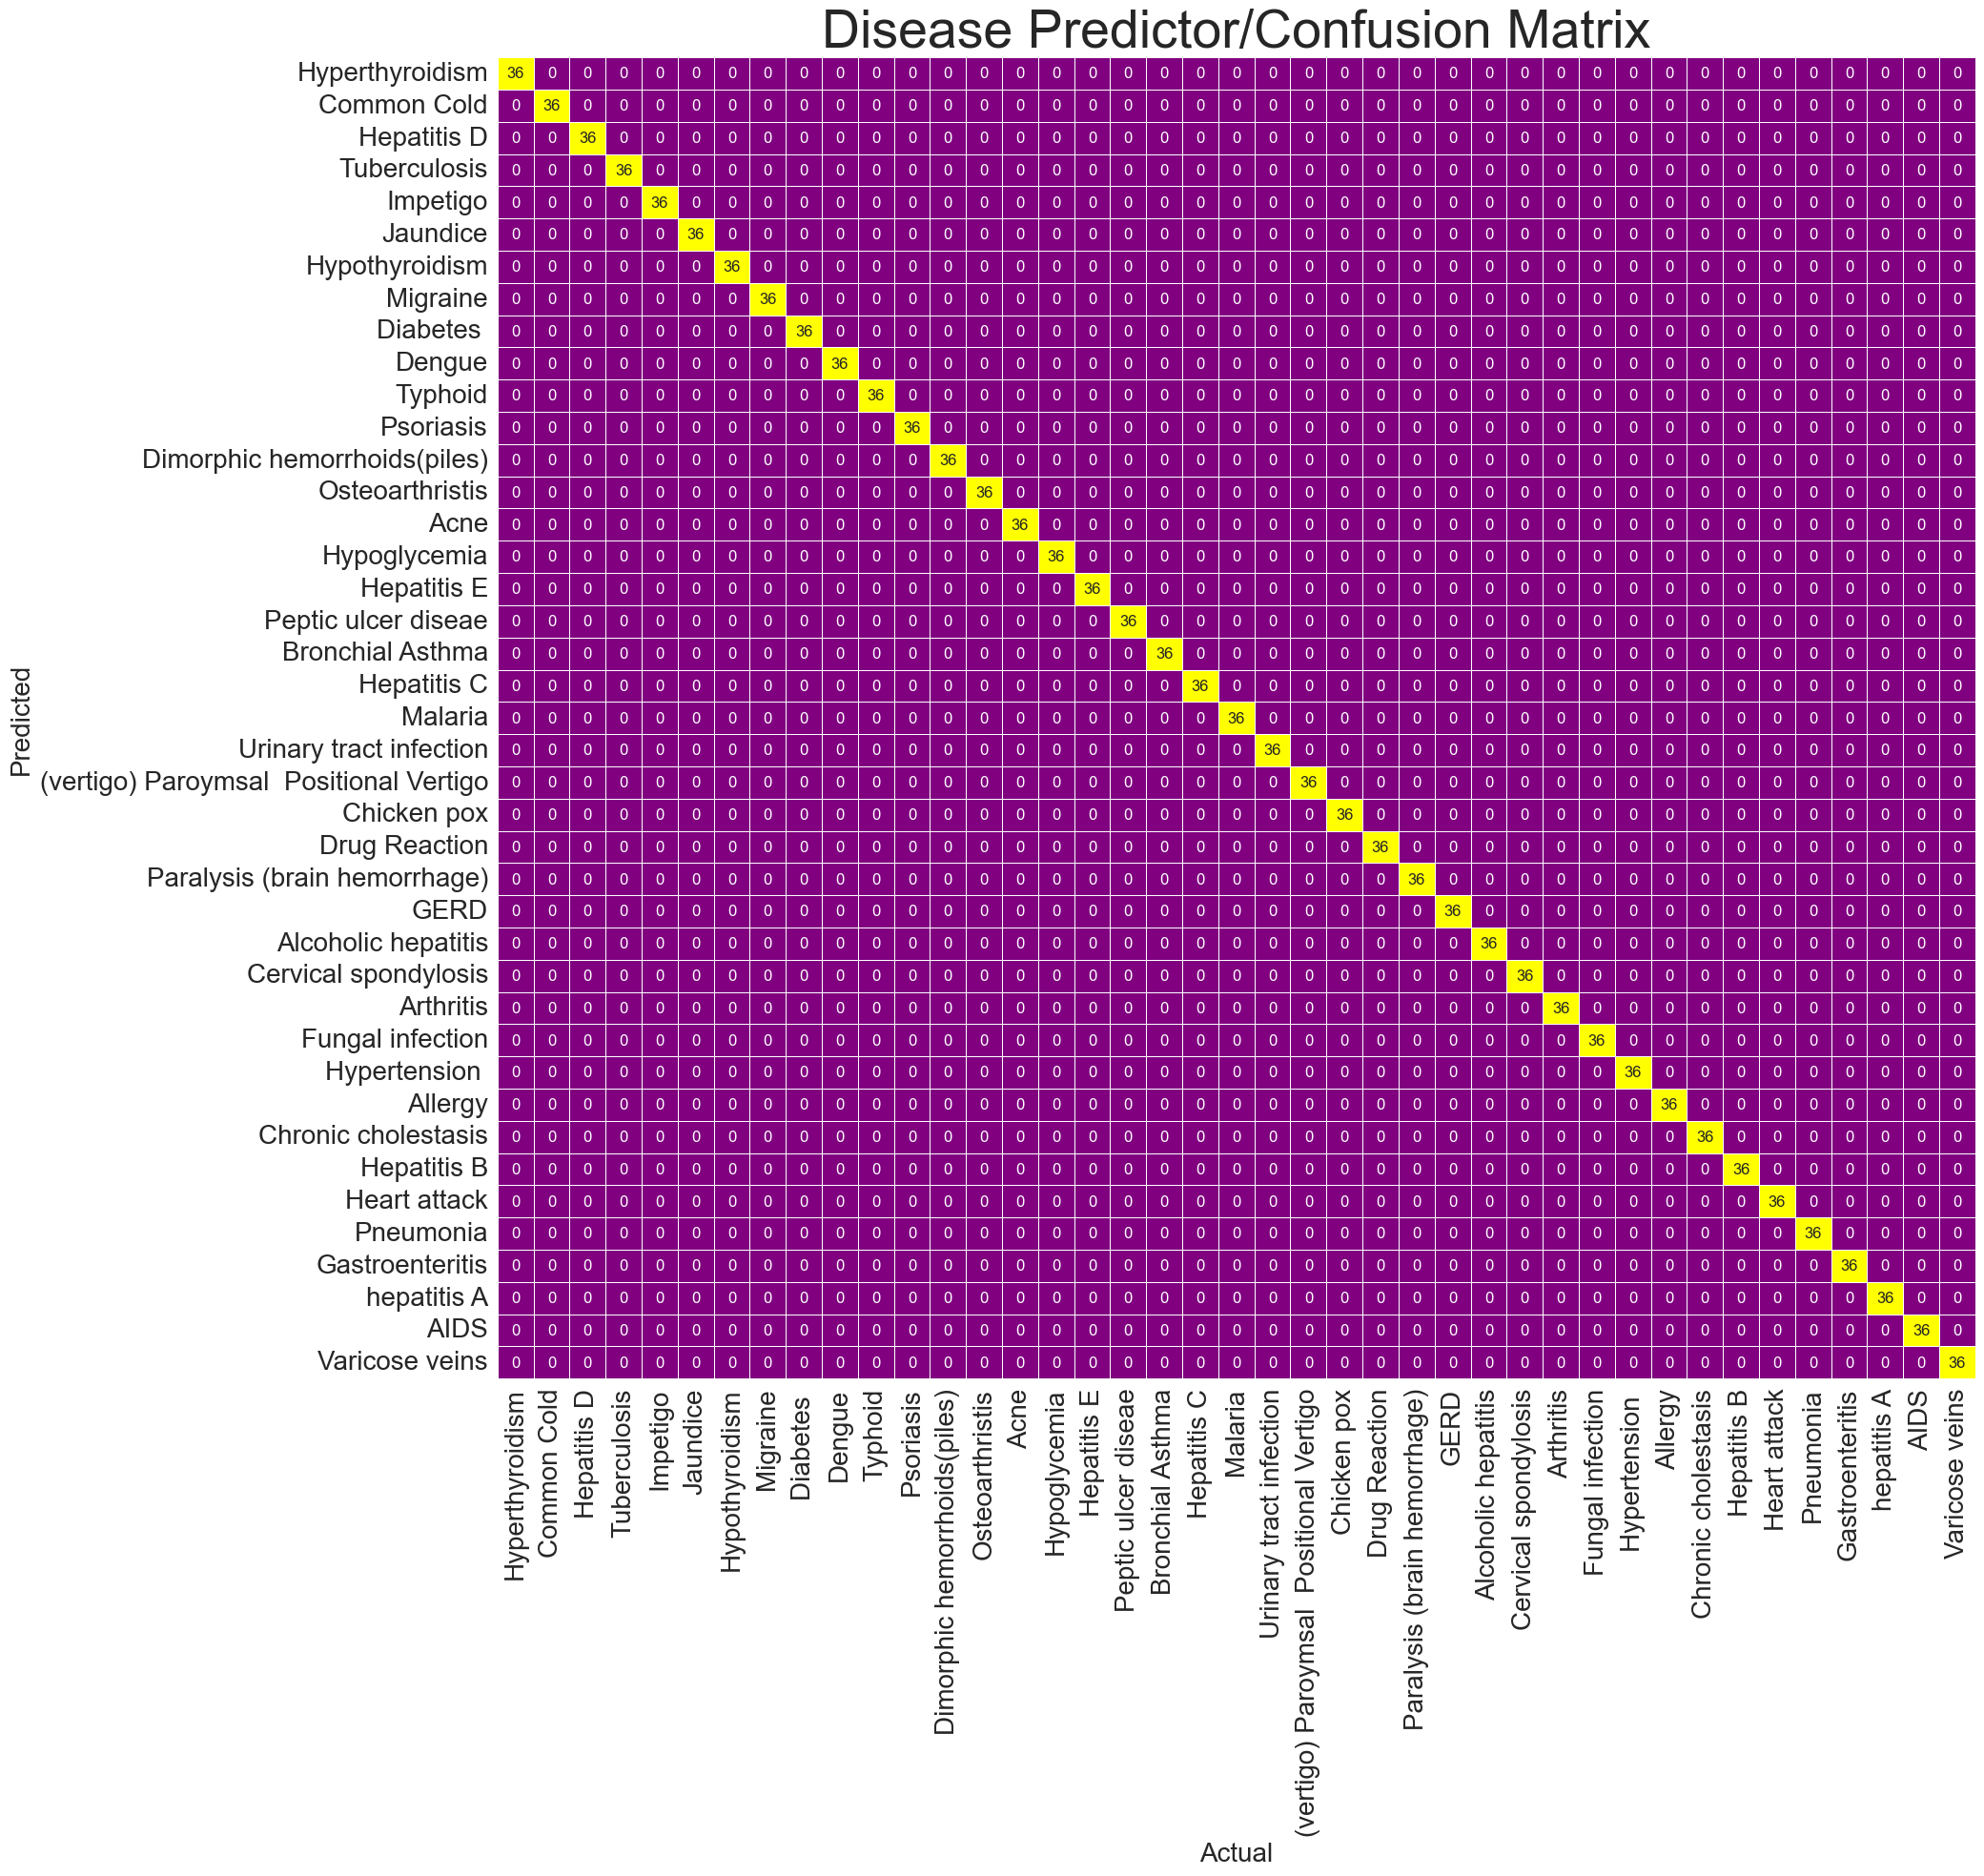

In [18]:
cf.sns_cm(pred3.Disease,pred3.prediction_label)
